In [1]:
%matplotlib inline
import os
from tomato.audio.AudioAnalyzer import AudioAnalyzer
import pylab
pylab.rcParams['figure.figsize'] = (20, 8)


In [2]:
# instantiate
audio_filepath = os.path.join('ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede',
                              'f970f1e0-0be9-4914-8302-709a0eac088e',
                              'f970f1e0-0be9-4914-8302-709a0eac088e.mp3')
save_filepath = os.path.join('ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede',
                              'f970f1e0-0be9-4914-8302-709a0eac088e',
                              'f970f1e0-0be9-4914-8302-709a0eac088e.pkl')
audioAnalyzer = AudioAnalyzer(verbose=True)


You can use the single line call "analyze," which does all the available analysis simultaneously

- Getting relevant metadata of ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/f970f1e0-0be9-4914-8302-709a0eac088e/f970f1e0-0be9-4914-8302-709a0eac088e.mp3
- Extracting predominant melody of ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/f970f1e0-0be9-4914-8302-709a0eac088e/f970f1e0-0be9-4914-8302-709a0eac088e.mp3
- Filtering predominant melody of ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/f970f1e0-0be9-4914-8302-709a0eac088e/f970f1e0-0be9-4914-8302-709a0eac088e.mp3
- Obtaining the melodic progression model of ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/f970f1e0-0be9-4914-8302-709a0eac088e/f970f1e0-0be9-4914-8302-709a0eac088e.mp3
- Identifying tonic from the predominant melody of ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/f970f1e0-0be9-4914-8302-709a0eac088e/f970f1e0-0be9-4914-8302-709a0eac088e.mp3
- Computing pitch distribution of ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/f970f1e0-0be9-4914-8302-709a0eac088e/f970f1e0-0be9-4914-8302-709a0eac088e.mp3
- 

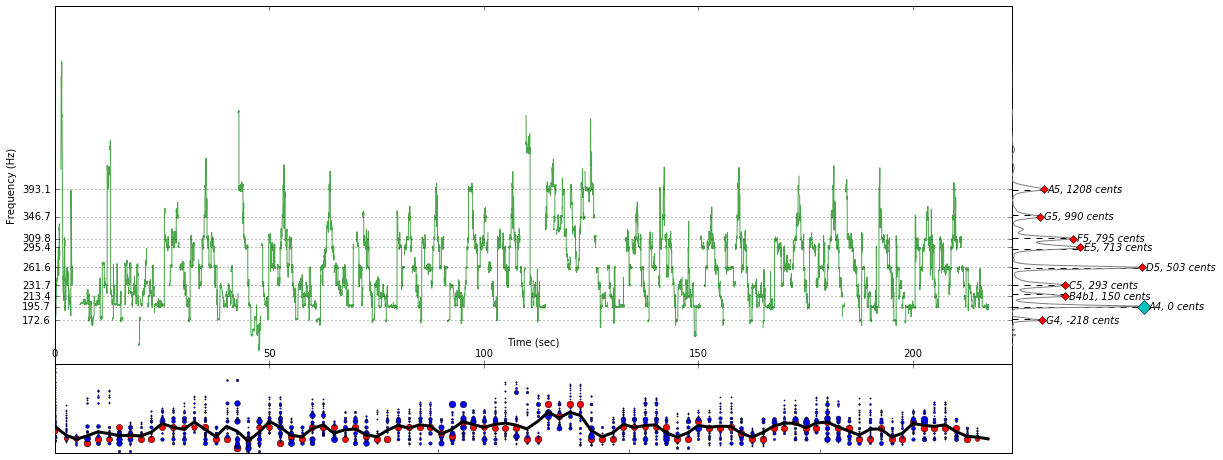

In [3]:
# NOTE: This will take several minutes depending on the performance of your machine
features = audioAnalyzer.analyze(audio_filepath)

# plot the features
audioAnalyzer.plot(features)
pylab.show()


... or call all the methods individually

In [4]:
# audio metadata extraction
audio_metadata = audioAnalyzer.get_musicbrainz_metadata(audio_filepath)

# predominant melody extraction
pitch = audioAnalyzer.extract_pitch(audio_filepath)

# even though predominant melody calls the pitch filter in Essentia,
# it is not as goot as Sercan Atli's implementation in Python.
pitch_filtered = audioAnalyzer.filter_pitch(pitch)

# get the melodic prograssion model
melodic_progression = audioAnalyzer.get_melodic_progression(pitch_filtered)

# tonic identification
tonic = audioAnalyzer.identify_tonic(pitch_filtered)

# histogram computation
pitch_distribution = audioAnalyzer.compute_pitch_distribution(pitch_filtered, tonic)
pitch_class_distribution = pitch_distribution.to_pcd()

# get the makam from metadata
makams = set(m['attribute_key'] for m in audio_metadata['makam'])
makam = list(makams)[0]  # for now get the first makam

# transposition (ahenk) identification
transposition = audioAnalyzer.identify_transposition(tonic, makam)

# stable note extraction (tuning analysis)
stable_notes = audioAnalyzer.get_stable_notes(pitch_distribution, tonic, makam)


- Getting relevant metadata of ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/f970f1e0-0be9-4914-8302-709a0eac088e/f970f1e0-0be9-4914-8302-709a0eac088e.mp3
- Extracting predominant melody of ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/f970f1e0-0be9-4914-8302-709a0eac088e/f970f1e0-0be9-4914-8302-709a0eac088e.mp3
- Filtering predominant melody of ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/f970f1e0-0be9-4914-8302-709a0eac088e/f970f1e0-0be9-4914-8302-709a0eac088e.mp3
- Obtaining the melodic progression model of ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/f970f1e0-0be9-4914-8302-709a0eac088e/f970f1e0-0be9-4914-8302-709a0eac088e.mp3
- Identifying tonic from the predominant melody of ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/f970f1e0-0be9-4914-8302-709a0eac088e/f970f1e0-0be9-4914-8302-709a0eac088e.mp3
- Computing pitch distribution of ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/f970f1e0-0be9-4914-8302-709a0eac088e/f970f1e0-0be9-4914-8302-709a0eac088e.mp3
- 